# Tensorflow and Image Classification

We will be following the TensorFlow tutorial until the Confusion Matrix portion of this notebook:

https://www.tensorflow.org/tutorials/keras/classification

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


## Import the Fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Store class names under class_names

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

## Explore the Data

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

So we can see that the training set has 60,000 samples of 28 X 28 pixel images.
The test set has 10,000 sameples of the same resolution.

## Preprocess the data

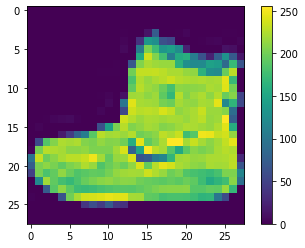

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pixel values fall in range between 0-255. We need to normalize these before feeding them into a neural network model. So we divide the values by 255. Both training and test set are preprocessed this way.

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Now we verify that the data is in the correct format by displaying the first 25 images from the training set and the class names for each.

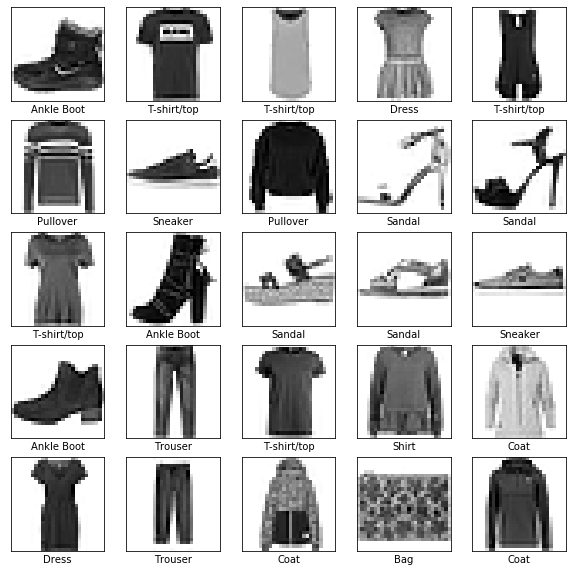

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model
First configure the layers of the model, then compile the model.

### Set up the layers
We will use `tf.keras.layers.Dense`, which has parameters that are learned during training.

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

The first layer `tf.keras.layers.Flatten` transforms the format of the images from a 2-d array, to a 1-d attay (28 x 28 = 784 pixels).

The next two `tf.keras.layers.Dense` layers are fully connected neural layers. The first layer has 128 nodes(neurons).The last layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1 and indicate the probability that the current image belongs to one of the 10 classes.

### Compile the model
The compile step has three settings:
- *Loss Function* - Measures how accurate the model is during training, minimize this function.

- *Optimizier* - How the model is updated based on the data it sees and its loss function.

- *Metrics* - Used to monitor the training and testing steps.

In [13]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Train the model
We will use the following steps to train the model:
1. Feed the training data (`train_images` and `train_labels`) to the model.
2. The model learns to associate images and labels.
3. Get predictions for `test_images`.
4. Verify predicitions against `test_labels`.

### Feed the model
We will create `history` object to store the output of `model.fit` for use later in our learning curve. We will also introduce `validation_data` in order to record accuracy and loss on our test sets during each epoch.

In [14]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4953 - accuracy: 0.8256 - val_loss: 0.4103 - val_accuracy: 0.8525
Epoch 2/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3708 - accuracy: 0.8649 - val_loss: 0.3865 - val_accuracy: 0.8614
Epoch 3/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3321 - accuracy: 0.8778 - val_loss: 0.3615 - val_accuracy: 0.8714
Epoch 4/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3094 - accuracy: 0.8878 - val_loss: 0.3593 - val_accuracy: 0.8673
Epoch 5/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2930 - accuracy: 0.8910 - val_loss: 0.3519 - val_accuracy: 0.8741
Epoch 6/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2770 - accuracy: 0.8970 - val_loss: 0.3452 - val_accuracy: 0.8782
Epoch 7/10
60000/60000 [==============================] 

### Evaluate accuracy

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3526 - accuracy: 0.8760

Test accuracy: 0.876


### Make predictions

In [16]:
predictions = model.predict(test_images)

In [17]:
predictions[0]

array([6.9425409e-06, 1.5115022e-08, 2.9320398e-07, 5.4214189e-09,
       1.3702836e-06, 2.7237347e-01, 3.6089716e-07, 1.7176764e-01,
       6.7077178e-07, 5.5584925e-01], dtype=float32)

`predictions[0]` shows us the first prediction, an array of 10 numbers, each number representing the confidence the image is one of the 10 different labels. We will use the following code to find which label has the highest confidence value:

In [18]:
class_names[np.argmax(predictions[0])]

'Ankle Boot'

Is this correct? The next line will display what the first image in `test_labels` is classified as:

In [19]:
class_names[test_labels[0]]

'Ankle Boot'

Now we will graph this to look at the full set of 10 class predictions.

In [20]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
              color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Verify predictions
We will use our graphing method to look at a couple of predictions, the 0th and 12th specifically. Correct predictions are blue, incorrect are red, the number is the percentage confidence for the predicted label.

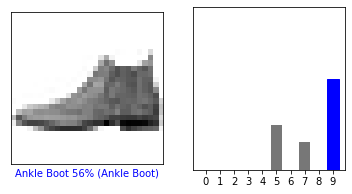

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

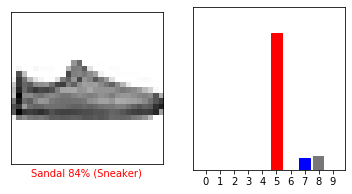

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

Now we will plot 15 images witht their predictions.

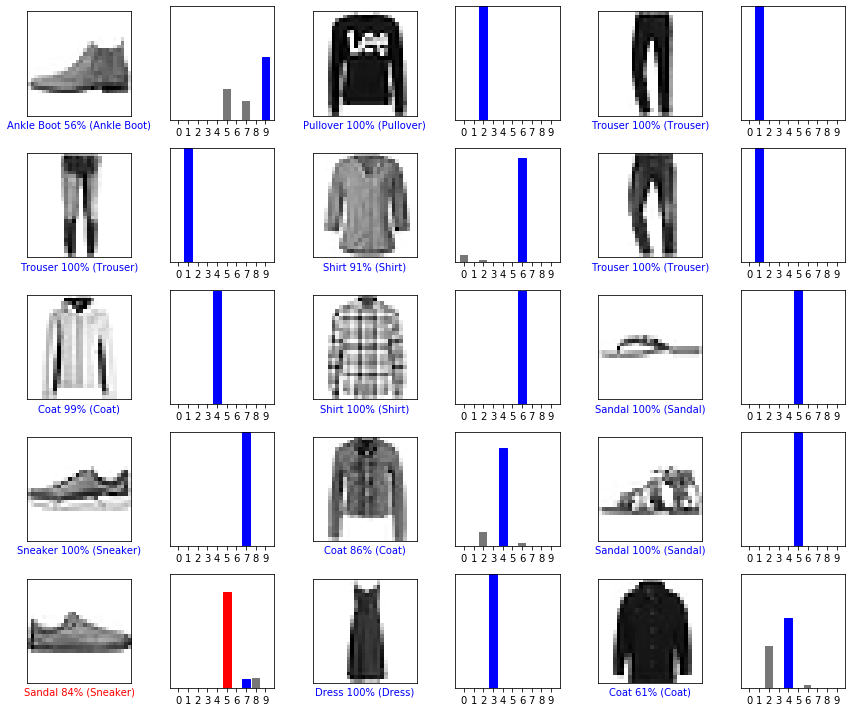

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model
Get an image from `test_images`

In [24]:
img = test_images[1]
print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a batch or collection at once. So we will need to add the single image to a list:

In [25]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.3835332e-05 1.0626139e-15 9.9951744e-01 6.7173514e-14 3.3412542e-04
  1.0870038e-12 1.3464992e-04 2.7295603e-23 4.1634474e-12 4.1053437e-17]]


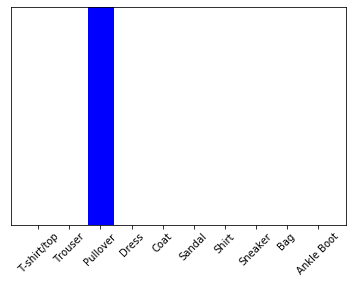

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

Since model.predict returns a confidence value for each label, lets see which label has the highest confidence value:

In [28]:
class_names[np.argmax(predictions_single[0])]

'Pullover'

Lets look at the image to see if it is correct:

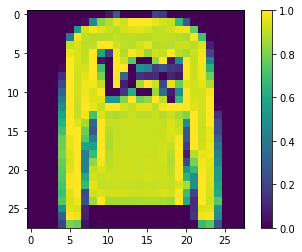

In [29]:
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

And the true label for that image:

In [30]:
class_names[test_labels[1]]

'Pullover'

Now lets turn our array of array from predictions into a one dimensional array consisting of the most likely label from each group

In [31]:
predicted_labels = predictions.argmax(axis=1)

Now we have a one dimensional array of the predictions for use in our confusion matrix

## Confusion Matrix
We will use `sklearn.metrics.confusion_matrix`.

In [32]:
from sklearn.metrics import confusion_matrix

We will use `plot_confusion_matrix` pulled from the scikit-learn.org tutorial:

https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html

In [33]:
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
cm = confusion_matrix(test_labels, predicted_labels)
np.set_printoptions(precision=2)

### Non-normalized Confusion Matrix
Since there are 1000 images of each class, normalization is not necessary.

[[817   1  19  30   5   3 117   0   8   0]
 [  2 967   2  20   3   0   4   1   1   0]
 [ 17   0 849  10  42   1  80   0   1   0]
 [ 16   2  16 904  33   1  23   0   5   0]
 [  1   0 191  34 660   0 113   0   1   0]
 [  0   0   0   0   0 982   0  13   0   5]
 [ 92   0  89  28  37   0 744   0  10   0]
 [  0   0   0   0   0  38   0 955   0   7]
 [  5   0   2   5   3   3   7   2 973   0]
 [  0   0   0   0   0  26   1  64   0 909]]


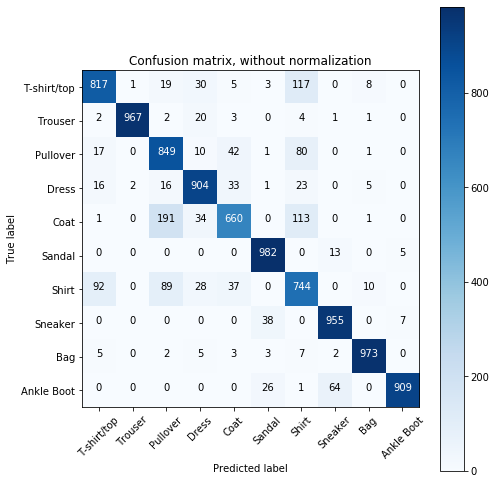

In [35]:
plt.figure(figsize=(7,7))
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')

#### Which classes tend to get confused?

It looks like the model has difficulty distinguishing images labeled *Shirt* as it is the class least correctly guessed. This may be because the shape of a shirt's edges are similar to other items of clothing such as T-shirts, tops, dresses, coats, etc.

As we can see in the chart, the *Shirt* row has predicted labels all over the place, with *T-shirt/top*, *Pullover*, *Coat* and *Dress* being mistaken for it. Because a shirt may be relatively general shape, with not many other distinguishing characteristics, it may satisfy our models trained defintion for other items of clothing, more than its own. This of course leads to the model having similar difficulties in correctly identifying the *T-shirt/top*, *Pullover*, *Coat* and *Dress* classes.

However the *Sandal*, *Trouser*, *Sneaker* and *Bag* classes seem to be relatively easily identified. They may have more disnctintive shapes that set them apart from other classes.

## Learning Curve over Training Time
Now lets see how our loss function and accuracy changes over each epoch of training on both the test and training sets.<br>Using `print(history.history.keys())` we can see which metrics our models `fit` function outputs out during each epoch of training

In [36]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


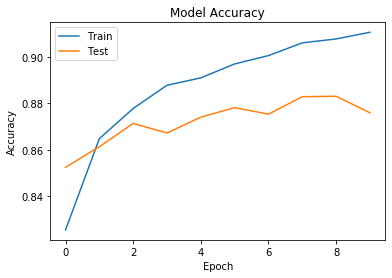

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

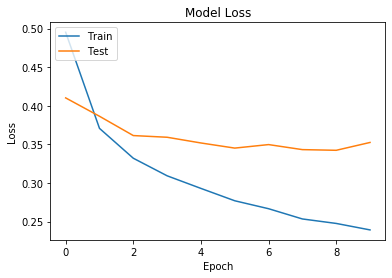

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Learning Curve over Data Availability
We will define a function that will train and evaluate the model over different sized datasets

In [39]:
from sklearn.model_selection import train_test_split

def create_dataset(n_train):
    x = train_images
    y = train_labels
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = n_train, random_state=42, shuffle=True)
    return x_train, x_test, y_train, y_test

We will set `epoch=6` so we don't have to wait too long.

In [40]:
def evaluate_model(n_train):
    x_train, x_test, y_train, y_test = create_dataset(n_train)
    model.fit(x_train, y_train, epochs=6, verbose=0)
    trainacc = model.evaluate(x_train, y_train, verbose=0)
    testacc = model.evaluate(test_images, test_labels, verbose=0)
    return trainacc, testacc

In [41]:
sizes = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000]
train_scores, test_scores = list(), list()
for n_train in sizes:
    scores = evaluate_model(n_train)
    acc1 = scores[0]
    acc2 = scores[1]
    train_scores.append(acc1[1])
    test_scores.append(acc2[1])
    print('Train Size=%d, Train Acc=%.3f, Test Acc=%.3f' % (n_train, acc1[1], acc2[1]))

Train Size=5000, Train Acc=0.952, Test Acc=0.878
Train Size=10000, Train Acc=0.951, Test Acc=0.880
Train Size=15000, Train Acc=0.958, Test Acc=0.883
Train Size=20000, Train Acc=0.950, Test Acc=0.877
Train Size=25000, Train Acc=0.952, Test Acc=0.882
Train Size=30000, Train Acc=0.957, Test Acc=0.881
Train Size=35000, Train Acc=0.959, Test Acc=0.881
Train Size=40000, Train Acc=0.961, Test Acc=0.886
Train Size=45000, Train Acc=0.960, Test Acc=0.884
Train Size=50000, Train Acc=0.955, Test Acc=0.881
Train Size=55000, Train Acc=0.966, Test Acc=0.884


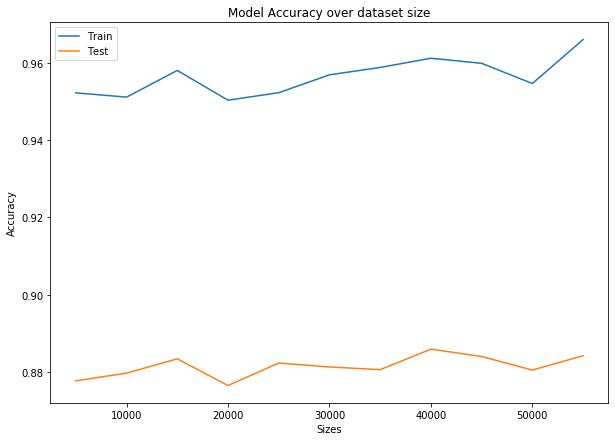

In [42]:
plt.figure(figsize=(10,7))
plt.plot(sizes, train_scores)
plt.plot(sizes, test_scores)
plt.title('Model Accuracy over dataset size')
plt.ylabel('Accuracy')
plt.xlabel('Sizes')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Conclusion

So to wrap up we have:
- Imported the Fashion MNIST dataset
- Followed the tutorial available at https://www.tensorflow.org/tutorials/keras/classification
- Created and trained our own Keras Sequential model
- Created a confusion matrix for our model to see which labels it has the most trouble with, using the scikit-learn tutorial available at https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
- Created a learning curve to see how accuracy changes over trainin epoch
- Created a function to see how accuracy changes over different sized datasets